In [1]:
import glob
import pandas as pd
files1 = glob.glob('C:/Users/sadan/OneDrive/MA Wolverhampton/thesis/liar/with_ahram/fake_news/*.txt', recursive=True)


In [2]:
ls1 = []
for file in files1:
    data1 = open(file, 'r',encoding='utf8')
    f1 = ls1.append(data1.read())

In [3]:
len(ls1)

3185

In [22]:
files3 = glob.glob('C:/Users/sadan/OneDrive/MA Wolverhampton/thesis/liar/with_ahram/real/*.txt', recursive=True)
len(files3)

468

In [27]:
pwd

'C:\\Users\\sadan\\OneDrive\\MA Wolverhampton\\thesis\\liar\\codes'

In [26]:
import os    
from chardet import detect

# get file encoding type
def get_encoding_type(file):
    with open(file, 'rb') as f:
        rawdata = f.read()
    return detect(rawdata)['encoding']
i= 0
for file in files3:
    i+=1
    from_codec = get_encoding_type(file)
    trgfile = 'coverted'+str(i) +'.txt'

    # add try: except block for reliability
    try: 
        with open(file, 'r', encoding=from_codec) as f, open(trgfile, 'w', encoding='utf-8') as e:
            text = f.read() # for small files, for big use chunks
            e.write(text)

        os.remove(file) # remove old encoding file
        os.rename(trgfile, file) # rename new encoding
    except UnicodeDecodeError:
        print('Decode Error')
    except UnicodeEncodeError:
        print('Encode Error')

In [28]:
files2 = glob.glob('C:/Users/sadan/OneDrive/MA Wolverhampton/thesis/liar/with_ahram/real_news/*.txt', recursive=True)
len(files2)

3710

In [30]:
ls2 = []
for file in files2:
    data2 = open(file, 'r', encoding ='utf-8')
    f2 = ls2.append(data2.read())

In [31]:
dataframe1 = []
for l in ls1:
    dataframe1.append([l,'fake'])
df1 = pd.DataFrame(dataframe1, columns = ['text', 'Label'])


In [32]:
dataframe2 = []
for l in ls2:
    dataframe2.append([l,'Real'])
df2 = pd.DataFrame(dataframe2, columns = ['text', 'Label'])

In [33]:
all_data = df1.append(df2)

In [34]:
len(all_data)

6895

In [35]:
all_data.head()

,text,Label
0,تحليل السيسي الرقم الصعب فى مؤتمر العشرين ا...,fake
1,طالب توجيهي يكتشف حبه لمتابعة النشرة الاقتصادي...,fake
2,عانس تجد عريسا رغم بلوغها سن الرابعة والعشرين...,fake
3,التنمية لم نضبط متسولين بأول أيام رمضان با...,fake
4,شاب ينزعج من خبر تفجير رغم وقوعه كالمعتاد في ب...,fake


In [36]:
import sklearn.utils
df = sklearn.utils.shuffle(all_data)
#print('\n\ndf: {0}'.format(df))
df.to_csv('fake_real_cnn.csv', encoding='utf-8')
df.head()

,text,Label
2899,ا مقتل ثلاثة جنود المان في افغانستان مقتل ثلا...,Real
781,حركة العدل والمساواة تفرج عن ستين من عناصر ال...,Real
3700,ا باكستان المحكمة العليا تهد بسجن رئيس مكتب م...,Real
3002,الأسطورة الحي ة كريم بنزيما يمت ع الجماهير بل...,fake
3116,باحث فرنسي مارين لوبان من نسل النبي محمد,fake


In [116]:
df = pd.read_csv('fake_real_cnn.csv', encoding='utf-8')

In [12]:
from sklearn import model_selection, preprocessing, linear_model, naive_bayes, metrics, svm
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn import decomposition, ensemble

import pandas, xgboost, numpy, textblob, string
from keras.preprocessing import text, sequence
from keras import layers, models, optimizers

import logging
import pandas as pd
import numpy as np
from numpy import random
import gensim
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix

C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
Using TensorFlow backend.
C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\tensorflow\python\framework\dtypes.py:523: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\sadan\AppData\Local\Continuum\anaconda3\envs\old_env\lib\site-packages\tensorflow\python\framework\dtypes.py:524: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 

In [117]:
import re
def cleaning (txt):
    
   
    a = ['خاص للحدود',
         ' ليتها ',
         ' سيكون قسم التعليقات متاحاً خلال بضعة أيّام ',
         ' سيكون قسم التعليقات متاحا  خلال بضعة ',
         ' وقعت على الأرض ضحكاً ',
         ' ضحكت دون أن أقع على الأرض ',
         ' مؤلم ',
         ' إبداع ',
         ' تجاوزت الحدود  ',
         ' غبي ',
         'المذكور أعلاه ',
         'سيكون قسم التعليقات متاحاً خلال بضعة أيّام ',
         '!',
         "''",
         ',',
         ':',
         '``',
         '،',
         '؟',
         '||',
         '٪',
         'سيكون قسم التعليقات متاحاً خلال بضعة أيّام',
         ' الحدود ',
         'ليتها',
         'كاريكاتير',
         ' آآآآآآآمين ',
         ' آآآه ',
         ' آآآآآخ ',
         'آآآآآآو ',
         '(',
         '=',
         '.',
         '[]',
         ')',
         ';',
         '{}',
         "“",
         "”",
         '-',
         '"',
         '/',
         "'",
         '&#',
         '#',
         '&',
         '%',
         '{ }',
         ' قد ',
         ' أن ',
         ' إن ',
         ' إلا ',
         ' تماماً ',
         ':'
         
         
        
        "كانون الأول","تشرين الثاني", ''
         ,"تشرين الأول "," أيلول","تموز"," حزيران "," أيار"," نيسان ","كانون الثاني", " شباط ",' أغسطس آب ',' بي بي سي '," آذار ",
         "BBC Arabic", "content=", "الرئيسية", "الشرق الأوسط"
         , "شارك برأيك", "اقتصاد وأعمال", "/>", "علوم وتكنولوجيا","منوعات", "العالم", "سؤال وجواب:"
         , " راديو وتلفزيون"
         ,  "GMT",'رياضة', " - - " ,'؟', '.',"''",',',':','``','=','،','-', 
         " آخر تحديث","بالصور","تشرين", "الثاني", "2009", "2010", "حزيران", "BBCArabic.com", "كانون", ' ! '
        ]
    for word in a:
        txt = txt.replace(word,'')
       
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    txt = re.sub(p_tashkeel,"", txt)#remove tashkeel (diactritics)
    txt = re.sub(r'\d+', ' ', txt) #substituting digits with 'number'
    txt = re.sub(r'[a-zA-Z]+', ' ', txt, flags=re.I) #deleting english letters
    txt = re.sub(r'\W', ' ', txt, flags = re.I) # remove sepcial characters
    txt = re.sub(r'\s+', ' ', txt) #Substituting multiple spaces with single space
    #txt = re.sub(r'(?:^| )\w(?:$| )', ' ', txt) #Substituting single characters
    #txt = re.sub(r'(\s+[a-zA-Z]\s+)', ' ', txt) #Substituting single characters
    



    return txt


In [118]:
df['text'] = df['text'].apply(cleaning)

In [119]:
df['text']

0        ا مقتل ثلاثة جنود المان في افغانستان مقتل ثلا...
1        حركة العدل والمساواة تفرج عن ستين من عناصر ال...
2        ا باكستان المحكمة العليا تهد بسجن رئيس مكتب م...
3       الأسطورة الحي ة كريم بنزيما يمت ع الجماهير بلم...
4               باحث فرنسي مارين لوبان من نسل النبي محمد 
5       انخفاض حاد لمنسوب الشباب لدى اليافعين أثبت مرك...
6        أم تستخدم مسدسا صاعقا لإيقاظ ابنها لحضور الصل...
7        اليمن مقتل ثلاثة جنود في محافظة شبوة على أيدي...
8        ا بريطانيا وفرنسا تقترحان صندوقا لمناخ في قمة...
9        الاتحاد الأوروبي يحث إسرائيل على وقف الاستيطا...
10      إنقاذ كاتب في حاول الانتحار هربا من شتائم القر...
11       قمة اقتصادية إسلامية في تركيا اليوم تستضيف تر...
12       ماذا يحدث في اليمن لو وجد المرء نفسه في صنعاء...
13      موظ ف حكومي يضطر لنوم باكرا كونه لم يحصل على ق...
14      هلي ل يجبر على الاستقالة بعدنسي الدعاء لحكام ا...
15      الحكومة تؤك د دعمها وتشجيعها التام لأقلي ات في...
16      سعودي لا يزال يتحدث عن الحقوق والحري ات رغم وج...
17       ا اته

In [120]:
df.isnull().sum()

Unnamed: 0    0
text          0
Label         0
dtype: int64

In [121]:
from sklearn.model_selection import train_test_split

# split complete dataset in train-test with ratio 80-20 respectively

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Label'], test_size=0.2, random_state=1)


# again split train data in train-validation with 90-10 ratio respectively

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [122]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(y_train)
valid_y = encoder.fit_transform(y_val)
test_y = encoder.fit_transform( y_test)


In [123]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train)
xvalid_count =  count_vect.transform(X_val)
xtest_count = count_vect.transform(X_test)

In [124]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=1500)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_val)
xtest_tfidf =  tfidf_vect.transform(X_test)
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1500)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1500)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_val)
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

In [125]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid,test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(valid_y,predictions)    
    confusion = confusion_matrix(valid_y,predictions)
    report = classification_report(predictions, valid_y, target_names=['fake', 'Real'],digits=4)
    test_precit = classifier.predict(test)
    acc_test = metrics.accuracy_score(test_y,test_precit)
    confusion_test = confusion_matrix(test_y,test_precit)
    test_report = classification_report(test_precit, test_y, target_names=['fake', 'Real'],digits=4)
    #print("Total score for {} is {}".format(name, score))
    return print( 'train_acc {} \n confusion_tain {} \n\n train_report {} \n \n acc_test {} \n confusion_test {} \n  {}'.format(acc,confusion,report,acc_test,confusion_test,test_report)) 


In [126]:
# Naive Bayes on Count Vectors third round
from sklearn.metrics import classification_report
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,xtest_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

train_acc 0.9384057971014492 
 confusion_tain [[271   1]
 [ 33 247]] 

 train_report              precision    recall  f1-score   support

       fake     0.9963    0.8914    0.9410       304
       Real     0.8821    0.9960    0.9356       248

avg / total     0.9450    0.9384    0.9386       552
 
 
 acc_test 0.9572153734590283 
 confusion_test [[726   2]
 [ 57 594]] 
               precision    recall  f1-score   support

       fake     0.9973    0.9272    0.9610       783
       Real     0.9124    0.9966    0.9527       596

avg / total     0.9606    0.9572    0.9574      1379

None NB, Count Vectors: 
train_acc 0.9420289855072463 
 confusion_tain [[269   3]
 [ 29 251]] 

 train_report              precision    recall  f1-score   support

       fake     0.9890    0.9027    0.9439       298
       Real     0.8964    0.9882    0.9401       254

avg / total     0.9464    0.9420    0.9421       552
 
 
 acc_test 0.9499637418419145 
 confusion_test [[711  17]
 [ 52 599]] 
            

In [21]:
# Naive Bayes on Count Vectors new
from sklearn.metrics import classification_report
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,xtest_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

train_acc 0.9784313725490196 
 confusion_tain [[256   0]
 [ 11 243]] 
 report_train              precision    recall  f1-score   support

       fake     1.0000    0.9588    0.9790       267
       Real     0.9567    1.0000    0.9779       243

avg / total     0.9794    0.9784    0.9784       510

 acc_test 0.9693877551020408 
 confusion_test [[631   3]
 [ 36 604]] 
 test_report              precision    recall  f1-score   support

       fake     0.9953    0.9460    0.9700       667
       Real     0.9437    0.9951    0.9687       607

avg / total     0.9707    0.9694    0.9694      1274

None NB, Count Vectors: 
train_acc 0.9372549019607843 
 confusion_tain [[244  12]
 [ 20 234]] 
 report_train              precision    recall  f1-score   support

       fake     0.9531    0.9242    0.9385       264
       Real     0.9213    0.9512    0.9360       246

avg / total     0.9378    0.9373    0.9373       510

 acc_test 0.9513343799058085 
 confusion_test [[614  20]
 [ 42 598]] 
 test_rep

In [59]:
# Naive Bayes on Count Vectors
from sklearn.metrics import classification_report
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,xtest_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

train_acc 0.9668615984405458 
 confusion_tain [[231   2]
 [ 15 265]] 
 report_train              precision    recall  f1-score   support

       fake     0.9914    0.9390    0.9645       246
       Real     0.9464    0.9925    0.9689       267

avg / total     0.9680    0.9669    0.9668       513

 acc_test 0.961028838659392 
 confusion_test [[620   3]
 [ 47 613]] 
 test_report              precision    recall  f1-score   support

       fake     0.9952    0.9295    0.9612       667
       Real     0.9288    0.9951    0.9608       616

avg / total     0.9633    0.9610    0.9610      1283

None NB, Count Vectors: 
train_acc 0.9454191033138402 
 confusion_tain [[226   7]
 [ 21 259]] 
 report_train              precision    recall  f1-score   support

       fake     0.9700    0.9150    0.9417       247
       Real     0.9250    0.9737    0.9487       266

avg / total     0.9466    0.9454    0.9453       513

 acc_test 0.9594699922057678 
 confusion_test [[605  18]
 [ 34 626]] 
 test_repo

# segmented cnn and jazeera

In [63]:
import glob
import pandas as pd
files1 = glob.glob('C:/Users/sadan/OneDrive/google_drive/fake_data/fake/*.segmented', recursive=True)


In [64]:
ls1 = []
for file in files1:
    data1 = open(file, 'r',encoding='utf8')
    f1 = ls1.append(data1.read())

In [65]:
len(ls1)

3185

In [26]:
# import os    
# from chardet import detect

# # get file encoding type
# def get_encoding_type(file):
#     with open(file, 'rb') as f:
#         rawdata = f.read()
#     return detect(rawdata)['encoding']
# i= 0
# for file in files3:
#     i+=1
#     from_codec = get_encoding_type(file)
#     trgfile = 'coverted'+str(i) +'.txt'

#     # add try: except block for reliability
#     try: 
#         with open(file, 'r', encoding=from_codec) as f, open(trgfile, 'w', encoding='utf-8') as e:
#             text = f.read() # for small files, for big use chunks
#             e.write(text)

#         os.remove(file) # remove old encoding file
#         os.rename(trgfile, file) # rename new encoding
#     except UnicodeDecodeError:
#         print('Decode Error')
#     except UnicodeEncodeError:
#         print('Encode Error')

In [66]:
files2 = glob.glob('C:/Users/sadan/OneDrive/google_drive/fake_data/real/*.segmented', recursive=True)
len(files2)

3710

In [67]:
ls2 = []
for file in files2:
    data2 = open(file, 'r', encoding ='utf-8')
    f2 = ls2.append(data2.read())

In [68]:
dataframe1 = []
for l in ls1:
    dataframe1.append([l,'fake'])
df1 = pd.DataFrame(dataframe1, columns = ['text', 'Label'])


In [69]:
dataframe2 = []
for l in ls2:
    dataframe2.append([l,'Real'])
df2 = pd.DataFrame(dataframe2, columns = ['text', 'Label'])

In [70]:
all_data = df1.append(df2)

In [71]:
len(all_data)

6895

In [72]:
all_data.head()

,text,Label
0,تحليل ال+سيسي ال+رقم ال+صعب فى مؤتمر ال+عشر+ين...,fake
1,طالب توجيهي ي+كتشف حب+ه ل+م+تابع+ة ال+نشر+ة ال...,fake
2,عانس ت+جد عريس+ا رغم بلوغ+ها سن ال+رابع+ة و+ال...,fake
3,ال+تنمي+ة لم ن+ضبط متسول+ين ب+أول أيام رمضان ب...,fake
4,شاب ي+نزعج من خبر تفجير رغم وقوع+ه ك+ال+معتاد ...,fake


In [73]:
import re
def cleaning (txt):
    
   
    a = ['خاص للحدود',
         ' ليتها ',
         ' سيكون قسم التعليقات متاحاً خلال بضعة أيّام ',
         ' سيكون قسم التعليقات متاحا  خلال بضعة ',
         ' وقعت على الأرض ضحكاً ',
         ' ضحكت دون أن أقع على الأرض ',
         ' مؤلم ',
         ' إبداع ',
         ' تجاوزت الحدود  ',
         ' غبي ',
         'المذكور أعلاه ',
         'سيكون قسم التعليقات متاحاً خلال بضعة أيّام ',
         '!',
         "''",
         ',',
         ':',
         '``',
         '،',
         '؟',
         '||',
         '٪',
         'سيكون قسم التعليقات متاحاً خلال بضعة أيّام',
         ' الحدود ',
         'ليتها',
         'كاريكاتير',
         ' آآآآآآآمين ',
         ' آآآه ',
         ' آآآآآخ ',
         'آآآآآآو ',
         '(',
         '=',
         '.',
         '[]',
         ')',
         ';',
         '{}',
         "“",
         "”",
         '-',
         '"',
         '/',
         "'",
         '&#',
         '#',
         '&',
         '%',
         '{ }',
         ' قد ',
         ' أن ',
         ' إن ',
         ' إلا ',
         ' تماماً ',
         ':'
         
         
        
        "كانون الأول","تشرين الثاني", ''
         ,"تشرين الأول "," أيلول","تموز"," حزيران "," أيار"," نيسان ","كانون الثاني", " شباط ",' أغسطس آب ',' بي بي سي '," آذار ",
         "BBC Arabic", "content=", "الرئيسية", "الشرق الأوسط"
         , "شارك برأيك", "اقتصاد وأعمال", "/>", "علوم وتكنولوجيا","منوعات", "العالم", "سؤال وجواب:"
         , " راديو وتلفزيون"
         ,  "GMT",'رياضة', " - - " ,'؟', '.',"''",',',':','``','=','،','-', 
         " آخر تحديث","بالصور","تشرين", "الثاني", "2009", "2010", "حزيران", "BBCArabic.com", "كانون", ' ! '
        ]
    for word in a:
        txt = txt.replace(word,'')
       
    p_tashkeel = re.compile(r'[\u0617-\u061A\u064B-\u0652]')
    txt = re.sub(p_tashkeel,"", txt)#remove tashkeel (diactritics)
    txt = re.sub(r'\d+', ' ', txt) #substituting digits with 'number'
    txt = re.sub(r'[a-zA-Z]+', ' ', txt, flags=re.I) #deleting english letters
    txt = re.sub(r'\W', ' ', txt, flags = re.I) # remove sepcial characters
    txt = re.sub(r'\s+', ' ', txt) #Substituting multiple spaces with single space
    #txt = re.sub(r'(?:^| )\w(?:$| )', ' ', txt) #Substituting single characters
    #txt = re.sub(r'(\s+[a-zA-Z]\s+)', ' ', txt) #Substituting single characters
    



    return txt


In [74]:
all_data['text'] = all_data['text'].apply(cleaning)

In [78]:
all_data['text'][-20:]

3690    ا ال عراق عود ة ال عنف سلسل ة من ال هجم ات الت...
3691    ا ك رزاي ي طلب من امريكا و ال عالم تمويل ال قو...
3692    ا قتيل ا في هجوم انتحاري ب مول تان شرقي ب اكست...
3693    ا ماكريستال زياد ة عد ال جنود ستساهم في هزيم ة...
3694    ا ال برازيل سرق ة ملاين دول ار خلال نهائي كر ة...
3695    ا ماكريستال لن ن دحر ال قاعد ة ما لم ن قبض على...
3696    ا ب تريوس ال عنف و ال فوضى الى ت صاعد في افغان...
3697    ا أوباما ن ريد فرض عقوب ات جديد ة على إيران خل...
3698    ا أوباما ن ريد فرض عقوب ات جديد ة على إيران خل...
3699    ا ب اكستان ال محكم ة ال عليا ت هد ب سجن رئيس م...
3700    ا ب اكستان ال محكم ة ال عليا ت هد ب سجن رئيس م...
3701    ا بعد تفجيري موسك و ميدفيديف ي طلب قوانين جديد...
3702    ا بعد تفجيري موسك و ميدفيديف ي طلب قوانين جديد...
3703    ا بوتين اعتقال ال مسؤول ين عن تفجيري موسك و مس...
3704    ا بوتين اعتقال ال مسؤول ين عن تفجيري موسك و مس...
3705    ا اشتباك ات بين مسلح ين صومال ين و قوات كيني ة...
3706    ا اشتباك ات بين مسلح ين صومال ين و قوات كيني ة...
3707    ا أوبا

In [79]:
import sklearn.utils
df = sklearn.utils.shuffle(all_data)
#print('\n\ndf: {0}'.format(df))
df.to_csv('fake_real_cnn_seg.csv', encoding='utf-8')
df.head()

,text,Label
186,ال أم ال متحد ة ت ضيف أزم ة ال خليج إلى محادث ...,fake
2645,استبدال ال شواخص ال مروري ة في ال شوارع ب صور ...,fake
2965,شاب متمرد ي غادر جروب عائل ت ه على تطبيق و اتس...,fake
3271,ا وزير ال ثقاف ة ال فرنسي ي ثير جدل ا ب سب ميو...,Real
3033,مصر ت نتقد أوضاع حقوق ال إنسان و ال حري ات في ...,fake


In [80]:
df.isnull().sum()

text     0
Label    0
dtype: int64

In [81]:
from sklearn.model_selection import train_test_split

# split complete dataset in train-test with ratio 80-20 respectively

X_train, X_test, y_train, y_test = train_test_split(df['text'], df['Label'], test_size=0.1, random_state=1)


# again split train data in train-validation with 90-10 ratio respectively

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.1, random_state=1)

In [82]:
# label encode the target variable 
encoder = preprocessing.LabelEncoder()
train_y = encoder.fit_transform(y_train)
valid_y = encoder.fit_transform(y_val)
test_y = encoder.fit_transform( y_test)


In [83]:
# create a count vectorizer object 
count_vect = CountVectorizer(analyzer='word', token_pattern=r'\w{1,}')
count_vect.fit(df['text'])

# transform the training and validation data using count vectorizer object
xtrain_count =  count_vect.transform(X_train)
xvalid_count =  count_vect.transform(X_val)
xtest_count = count_vect.transform(X_test)

In [84]:
# word level tf-idf
tfidf_vect = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', max_features=1500)
tfidf_vect.fit(df['text'])
xtrain_tfidf =  tfidf_vect.transform(X_train)
xvalid_tfidf =  tfidf_vect.transform(X_val)
xtest_tfidf =  tfidf_vect.transform(X_test)
# ngram level tf-idf 
tfidf_vect_ngram = TfidfVectorizer(analyzer='word', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1500)
tfidf_vect_ngram.fit(df['text'])
xtrain_tfidf_ngram =  tfidf_vect_ngram.transform(X_train)
xvalid_tfidf_ngram =  tfidf_vect_ngram.transform(X_val)
xtest_tfidf_ngram =  tfidf_vect_ngram.transform(X_test)
# characters level tf-idf
tfidf_vect_ngram_chars = TfidfVectorizer(analyzer='char', token_pattern=r'\w{1,}', ngram_range=(2,3), max_features=1500)
tfidf_vect_ngram_chars.fit(df['text'])
xtrain_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_train) 
xvalid_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_val)
xtest_tfidf_ngram_chars =  tfidf_vect_ngram_chars.transform(X_test) 

In [85]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid,test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(valid_y,predictions)    
    confusion = confusion_matrix(valid_y,predictions)
    report = classification_report(predictions, valid_y, target_names=['fake', 'Real'],digits=4)
    test_precit = classifier.predict(test)
    acc_test = metrics.accuracy_score(test_y,test_precit)
    confusion_test = confusion_matrix(test_y,test_precit)
    test_report = classification_report(test_precit, test_y, target_names=['fake', 'Real'],digits=4)
    #print("Total score for {} is {}".format(name, score))
    return print( 'train_acc {} \n confusion_tain {} \n\n  {} \n \n acc_test {} \n confusion_test {} \n test_report {}'.format(acc,confusion,report,acc_test,confusion_test,test_report)) 


In [86]:
# Naive Bayes on Count Vectors third round
from sklearn.metrics import classification_report
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,xtest_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

train_acc 0.9710144927536232 
 confusion_tain [[340   0]
 [ 18 263]] 

               precision    recall  f1-score   support

       fake     1.0000    0.9497    0.9742       358
       Real     0.9359    1.0000    0.9669       263

avg / total     0.9729    0.9710    0.9711       621
 
 
 acc_test 0.9579710144927536 
 confusion_test [[365   5]
 [ 24 296]] 
 test_report              precision    recall  f1-score   support

       fake     0.9865    0.9383    0.9618       389
       Real     0.9250    0.9834    0.9533       301

avg / total     0.9597    0.9580    0.9581       690

None NB, Count Vectors: 
train_acc 0.964573268921095 
 confusion_tain [[333   7]
 [ 15 266]] 

               precision    recall  f1-score   support

       fake     0.9794    0.9569    0.9680       348
       Real     0.9466    0.9744    0.9603       273

avg / total     0.9650    0.9646    0.9646       621
 
 
 acc_test 0.9449275362318841 
 confusion_test [[360  10]
 [ 28 292]] 
 test_report              

In [21]:
# Naive Bayes on Count Vectors new
from sklearn.metrics import classification_report
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

# Naive Bayes on Word Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf, train_y, xvalid_tfidf,xtest_tfidf)
print ("NB, WordLevel TF-IDF: ", accuracy)

# Naive Bayes on Ngram Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram, train_y, xvalid_tfidf_ngram,xtest_tfidf_ngram)
print ("NB, N-Gram Vectors: ", accuracy)

# Naive Bayes on Character Level TF IDF Vectors
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_tfidf_ngram_chars, train_y, xvalid_tfidf_ngram_chars,xtest_tfidf_ngram_chars)
print( "NB, CharLevel Vectors: ", accuracy)

train_acc 0.9784313725490196 
 confusion_tain [[256   0]
 [ 11 243]] 
 report_train              precision    recall  f1-score   support

       fake     1.0000    0.9588    0.9790       267
       Real     0.9567    1.0000    0.9779       243

avg / total     0.9794    0.9784    0.9784       510

 acc_test 0.9693877551020408 
 confusion_test [[631   3]
 [ 36 604]] 
 test_report              precision    recall  f1-score   support

       fake     0.9953    0.9460    0.9700       667
       Real     0.9437    0.9951    0.9687       607

avg / total     0.9707    0.9694    0.9694      1274

None NB, Count Vectors: 
train_acc 0.9372549019607843 
 confusion_tain [[244  12]
 [ 20 234]] 
 report_train              precision    recall  f1-score   support

       fake     0.9531    0.9242    0.9385       264
       Real     0.9213    0.9512    0.9360       246

avg / total     0.9378    0.9373    0.9373       510

 acc_test 0.9513343799058085 
 confusion_test [[614  20]
 [ 42 598]] 
 test_rep

In [106]:
import itertools
import matplotlib.pyplot as plt

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [109]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report
def train_model(classifier, feature_vector_train, label, feature_vector_valid,test, is_neural_net=False):
    # fit the training dataset on the classifier
    classifier.fit(feature_vector_train, label)
    
    # predict the labels on validation dataset
    predictions = classifier.predict(feature_vector_valid)
    
    if is_neural_net:
        predictions = predictions.argmax(axis=-1)
    acc = metrics.accuracy_score(valid_y,predictions)    
    confusion = confusion_matrix(valid_y,predictions)
    report = classification_report(predictions, valid_y, target_names=['fake', 'Real'],digits=4)
    test_precit = classifier.predict(test)
    acc_test = metrics.accuracy_score(test_y,test_precit)
    confusion_test = confusion_matrix(test_y,test_precit)
    test_report = classification_report(test_precit, test_y, target_names=['fake', 'Real'],digits=4)
    #print("Total score for {} is {}".format(name, score))
    plot_confusion_matrix(confusion_test, classes=['Real', 'Fake'])
    return print( 'train_acc {} \n confusion_tain {} \n\n  {} \n \n acc_test {} \n confusion_test {} \n test_report {}'.format(acc,confusion,report,acc_test,confusion_test,test_report)) 





Confusion matrix, without normalization
train_acc 0.966183574879227 
 confusion_tain [[330   1]
 [ 20 270]] 

               precision    recall  f1-score   support

       fake     0.9970    0.9429    0.9692       350
       Real     0.9310    0.9963    0.9626       271

avg / total     0.9682    0.9662    0.9663       621
 
 
 acc_test 0.9623188405797102 
 confusion_test [[344   1]
 [ 25 320]] 
 test_report              precision    recall  f1-score   support

       fake     0.9971    0.9322    0.9636       369
       Real     0.9275    0.9969    0.9610       321

avg / total     0.9647    0.9623    0.9624       690

None NB, Count Vectors: 


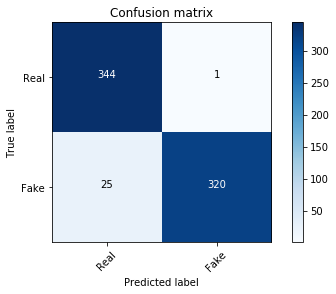

In [110]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")

Confusion matrix, without normalization
train_acc 0.9384057971014492 
 confusion_tain [[271   1]
 [ 33 247]] 

               precision    recall  f1-score   support

       fake     0.9963    0.8914    0.9410       304
       Real     0.8821    0.9960    0.9356       248

avg / total     0.9450    0.9384    0.9386       552
 
 
 acc_test 0.9572153734590283 
 confusion_test [[726   2]
 [ 57 594]] 
 test_report              precision    recall  f1-score   support

       fake     0.9973    0.9272    0.9610       783
       Real     0.9124    0.9966    0.9527       596

avg / total     0.9606    0.9572    0.9574      1379

None NB, Count Vectors: 


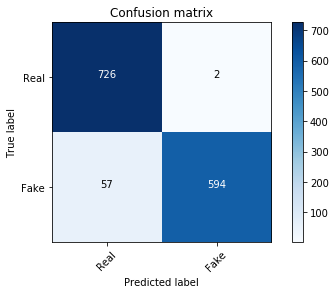

In [115]:
accuracy = train_model(naive_bayes.MultinomialNB(), xtrain_count, train_y, xvalid_count,xtest_count)
print ( accuracy,"NB, Count Vectors: ")